![Next Generation Weapon](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/02/pytorch-logo-flat-300x210.png)

        
* [**Section : 1. Neural Network**](#Section-:-2.-Neural-Network)
     * [Linear Regression](#Linear-Regression)
     * [Relationship Fitting Regression Model](#Relationship-Fitting-Regression-Model)
     * [Distinguish type classification](#Distinguish-type-classification)
     * [Easy way to Buid Neural Network](#Easy-way-to-Buid-Neural-Network)
     * [Save and Reload Model](#Save-and-Reload-Model)
     * [Train on Batch](#Train-on-batch)
     * [Optimizers](#Optimizers)
 
* [**Section : 2. Advance Neural Network**](#Section-:-3.-Advance-Neural-Network)
    * [CNN](#CNN)
    * [RNN-Classification](#RNN-Classification)
    * [RNN-Regression](#RNN-Regression)


Section : 1. Neural Network
---

---
### Linear Regression

---

* It is worth underlining that this is an example focused on re-applying the techniques introduced. Indeed, PyTorch offers much more advanced methodologies to accomplish the same task, introduced in the following tutorials.
* In this example we will consider a simple one-dimensional synthetic problem (with some added noise):
Example : 
![](https://i.pinimg.com/564x/cd/6e/c7/cd6ec7106cfd22cdfd5c542a84a8b869.jpg)

In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import torch
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
%matplotlib inline

import os

In [16]:
X = np.random.rand(30, 1)*2.0 #data points
w = np.random.rand(2, 1)
y = X*w[0] + w[1] + np.random.randn(30, 1) * 0.05

In order to detect the line's coefficient, we define a linear model:
#### Define Weight and Bias

In [17]:
from torch.autograd import Variable

W = Variable(torch.rand(1, 1), requires_grad=True)
b = Variable(torch.rand(1), requires_grad=True)

def linear(x):
    return torch.matmul(x, W) + b

* Using `torch.matmul` is redundant in this case, but we want the function to be as general as possible to be re-used for more complex models.

* We need to cast the dataset from NumPy to PyTorch (32bit) using float().
* The cost function is a mean squared error.
* After the back-propagation step we update the weights with a gradient descent, and we explicitly use W.data instead of W, in order not to override the original variables
* At the end of every iteration, gradients are reset.

In [18]:
Xt = Variable(torch.from_numpy(X)).float()
yt = Variable(torch.from_numpy(y)).float()

for epoch in range(2500):

    # Compute predictions
    y_pred = linear(Xt)

    # Compute cost function
    loss = torch.mean((y_pred - yt) ** 2)

    # Run back-propagation
    loss.backward()

    # Update variables
    W.data = W.data - 0.005*W.grad.data
    b.data = b.data - 0.005*b.grad.data

    # Reset gradients
    W.grad.data.zero_()
    b.grad.data.zero_()

* After Training we can see the graph like this
![](https://iaml.it/blog/fun-with-pytorch-part-1/images/regressione_lineare_2.png)

## Neural Network for Regression

In [19]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
torch.manual_seed(25)    # reproducible

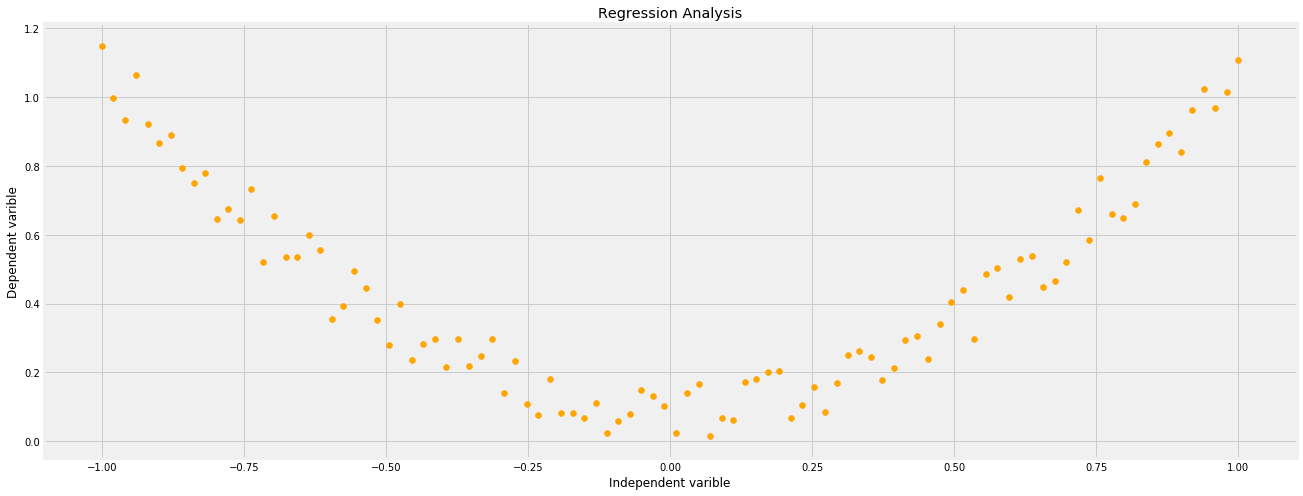

In [21]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)

# torch can only train on Variable, so convert them to Variable
x, y = Variable(x), Variable(y)
plt.figure(figsize=(20,8))
plt.scatter(x.data.numpy(), y.data.numpy(), color = "orange")
plt.title('Regression Analysis')
plt.xlabel('Independent varible')
plt.ylabel('Dependent varible')
plt.show()

### Model Fitting

In [22]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

In [23]:
net = Net(n_feature=1, n_hidden=10, n_output=1)     # define the network
print(net)  # net architecture

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


**Optimizer**

It is the most popular Optimization algorithms used in optimizing a Neural Network. Now gradient descent is majorly used to do Weights updates in a Neural Network Model , i.e update and tune the Model's parameters in a direction so that we can minimize the Loss function.

In [24]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss


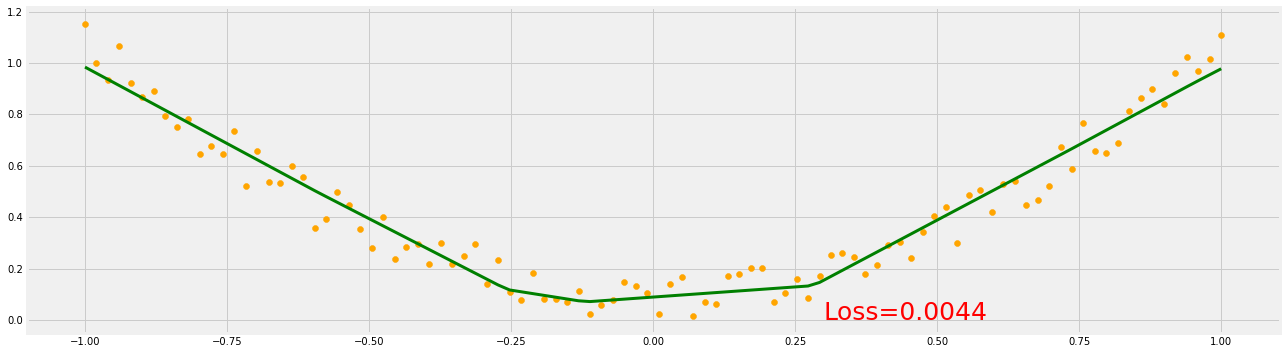

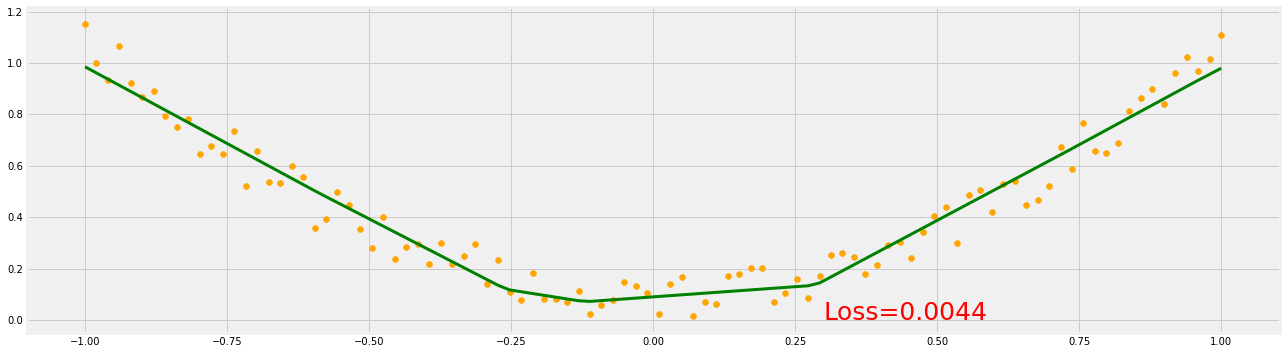

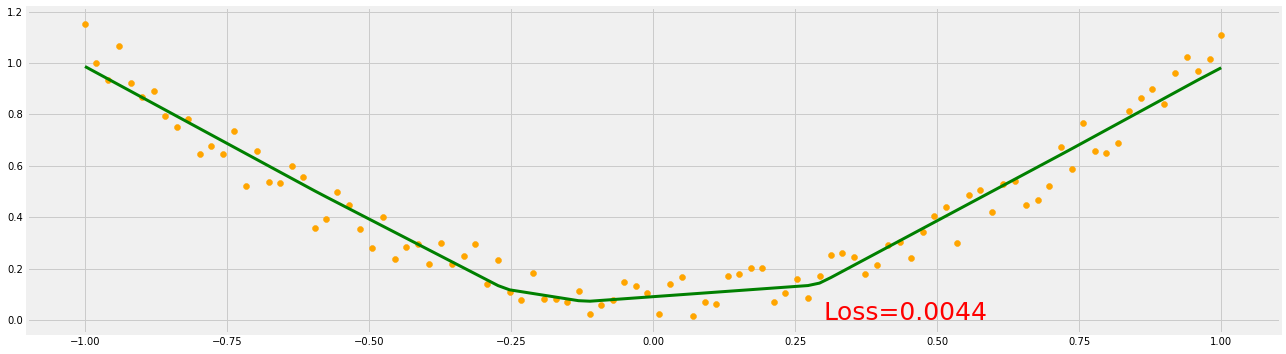

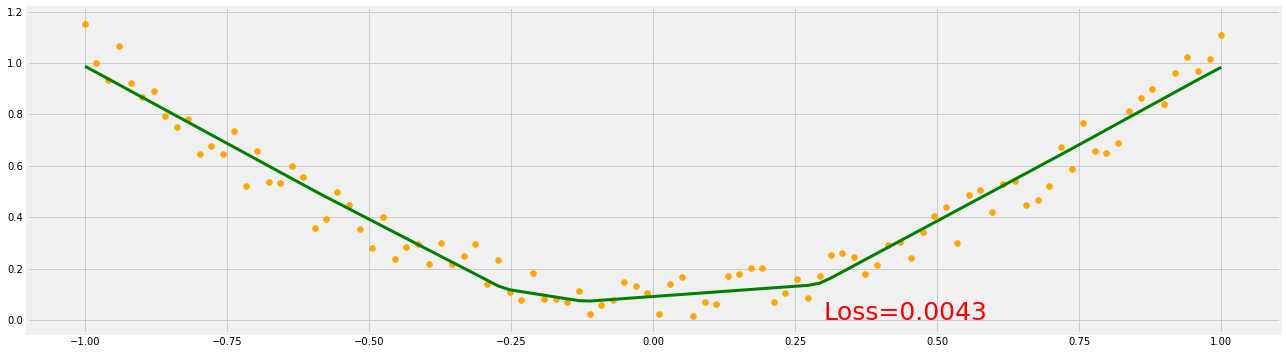

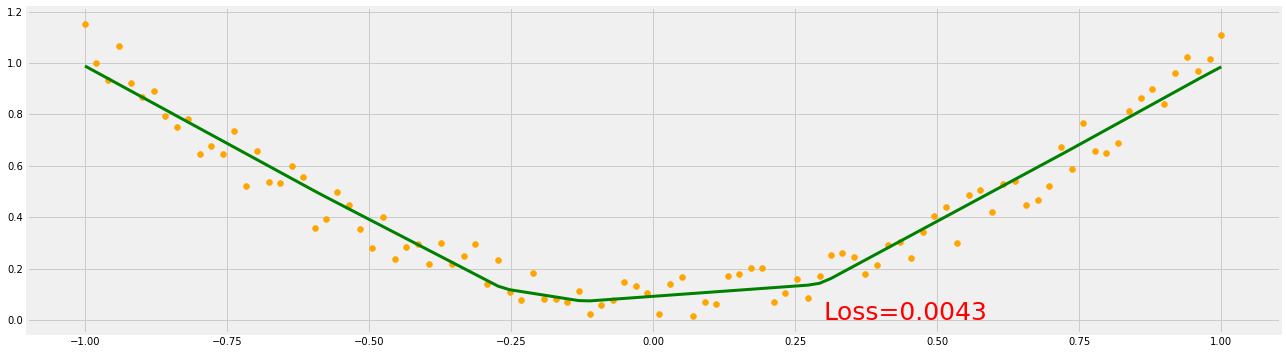

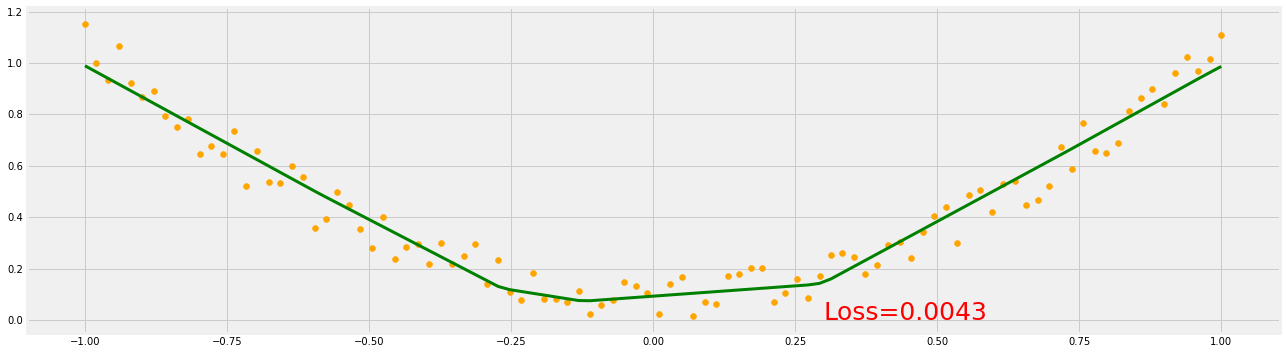

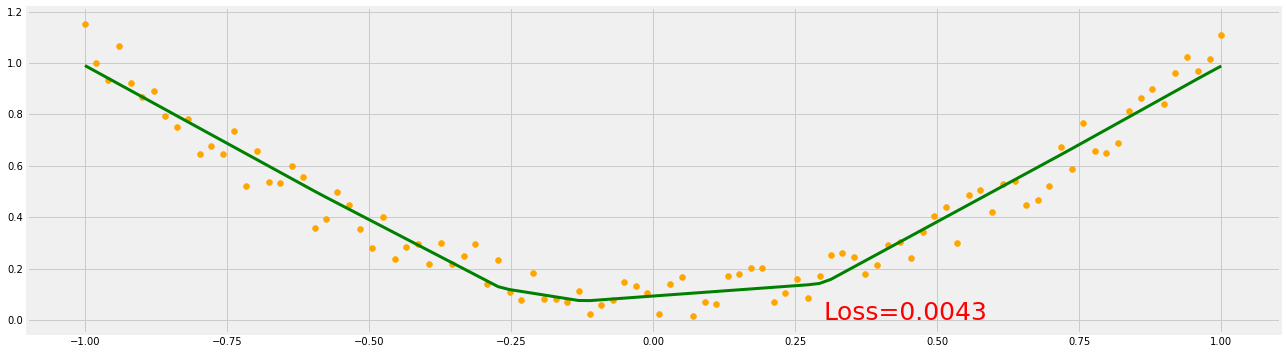

In [28]:
for t in range(70):
    prediction = net(x)     # input x and predict based on x

    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients
    if t % 10 == 0:
        # plot and show learning process
        plt.figure(figsize=(20,6))
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy(), color = "orange")
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'g-', lw=3)
        plt.text(0.3, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 25, 'color':  'red'})
        plt.show()
        plt.pause(0.1)


## Neural Network for Classification 

In [29]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

torch.manual_seed(25)    # reproducible

### Generate fake data

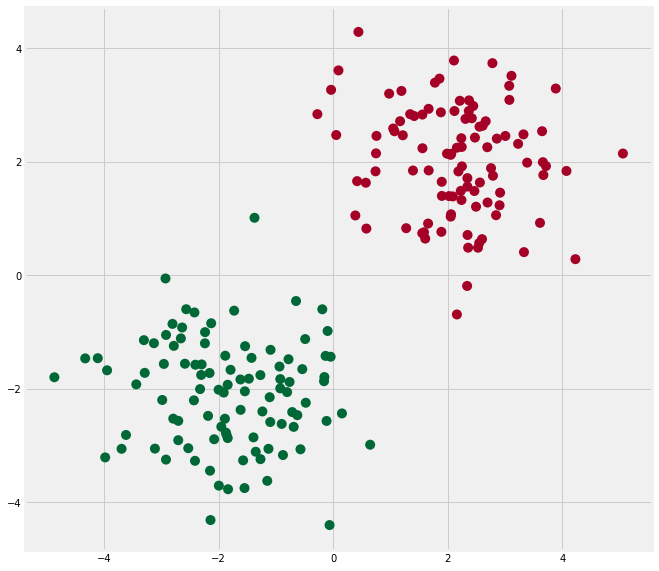

In [30]:
n_data = torch.ones(100, 2)
x0 = torch.normal(2*n_data, 1)      # class0 x data (tensor), shape=(100, 2)
y0 = torch.zeros(100)               # class0 y data (tensor), shape=(100, 1)
x1 = torch.normal(-2*n_data, 1)     # class1 x data (tensor), shape=(100, 2)
y1 = torch.ones(100)                # class1 y data (tensor), shape=(100, 1)
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)  # shape (200, 2) FloatTensor = 32-bit floating
y = torch.cat((y0, y1), ).type(torch.LongTensor)    # shape (200,) LongTensor = 64-bit integer

# torch can only train on Variable, so convert them to Variable
x, y = Variable(x), Variable(y)
plt.figure(figsize=(10,10))
plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()

### Model design

In [35]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.out = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.out(x)
        return x

### Define Network

In [36]:
net = Net(n_feature=2, n_hidden=10, n_output=2)     # define the network
print(net)  # net architecture

# Loss and Optimizer
# Softmax is internally computed.
# Set parameters to be updated.
optimizer = torch.optim.SGD(net.parameters(), lr=0.02)
loss_func = torch.nn.CrossEntropyLoss()  # the target label is NOT an one-hotted

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=2, bias=True)
)


### Plot the Model

/home/linu/.local/lib/python3.5/site-packages/ipykernel_launcher.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  del sys.path[0]


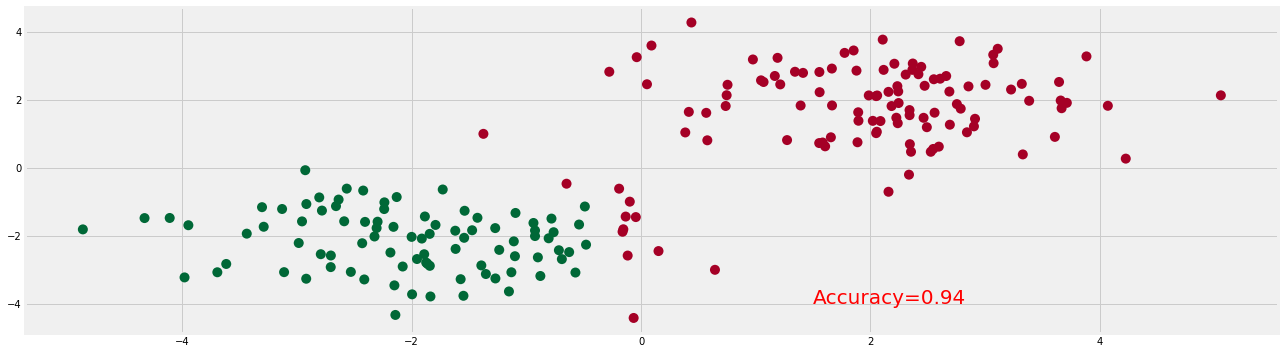

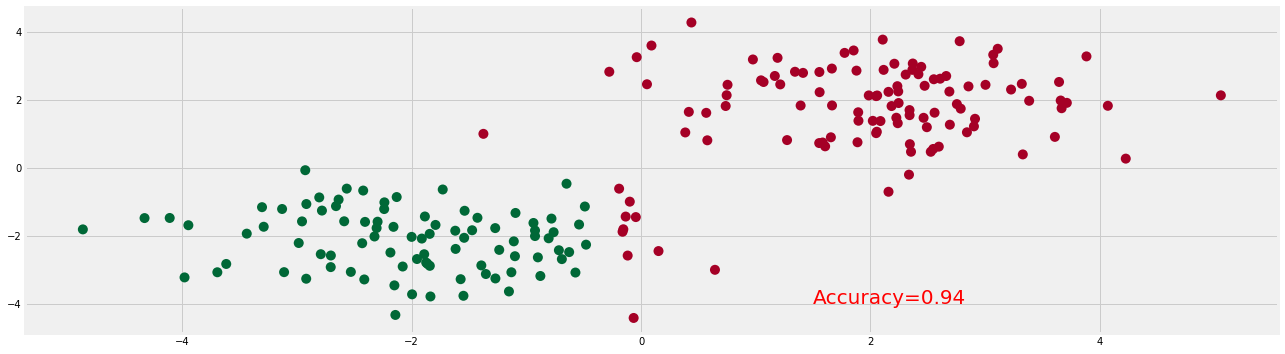

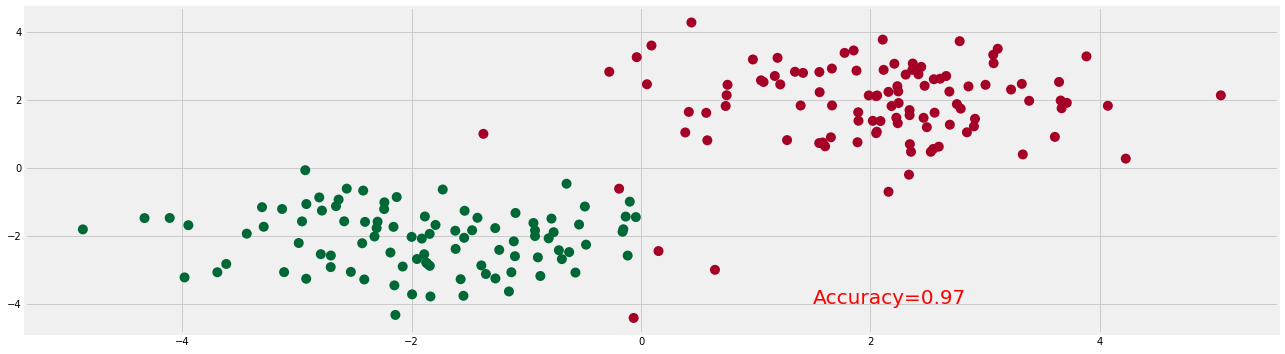

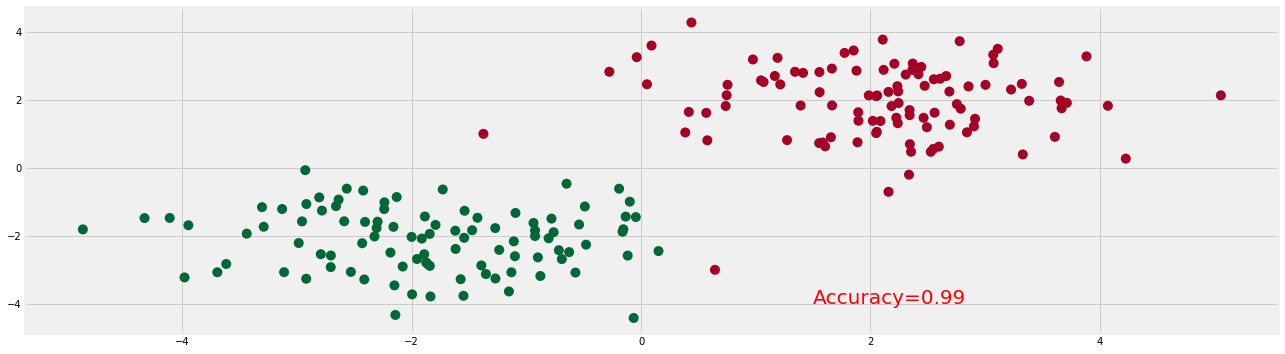

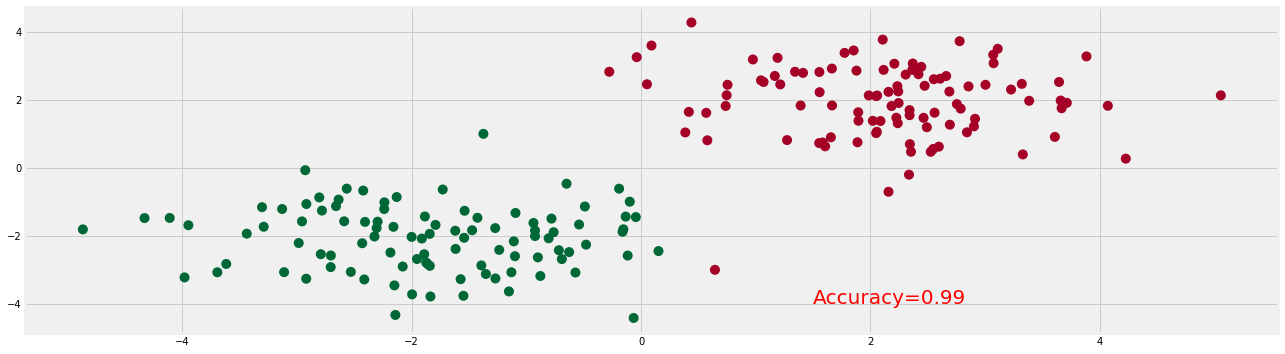

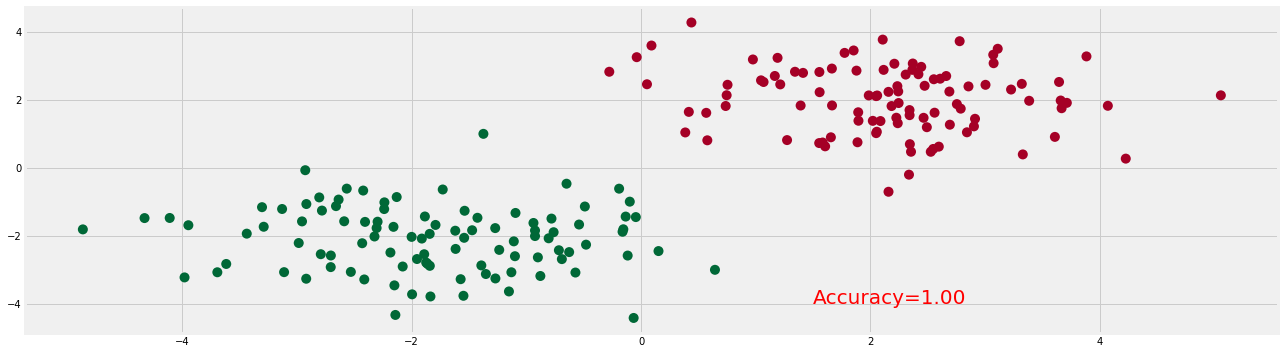

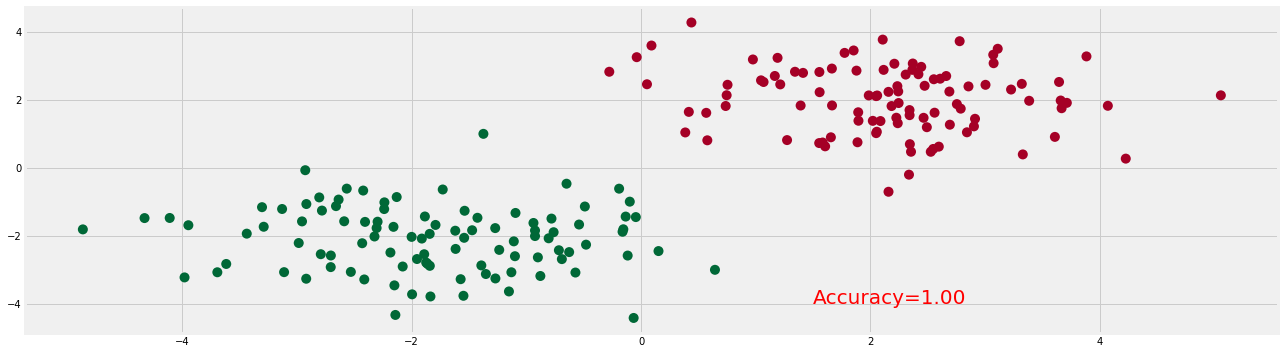

In [37]:
for t in range(50):
    out = net(x)                 # input x and predict based on x
    loss = loss_func(out, y)     # must be (1. nn output, 2. target), the target label is NOT one-hotted

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients
    
    if t % 10 == 0 or t in [3, 6]:
        # plot and show learning process
        plt.figure(figsize=(20,6))
        plt.cla()
        _, prediction = torch.max(F.softmax(out), 1)
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = sum(pred_y == target_y)/200.
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.show()
        plt.pause(0.1)

## Faster way to build models

In [38]:
# easy and fast way to build your network
net2 = torch.nn.Sequential(
    torch.nn.Linear(1, 10),
    torch.nn.ReLU(),
    torch.nn.Linear(10, 1)
)

In [40]:
print(net)     # net architecture
print(net2)     # net2 architecture

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=2, bias=True)
)
Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=1, bias=True)
)


## Save and Reload Model
---

### Generate Fake Data

In [42]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())  # noisy y data (tensor), shape=(100, 1)
x, y = Variable(x, requires_grad=False), Variable(y, requires_grad=False)

### Model Saving Function in Pickle Format

In [43]:
def save():
    # save net1
    net1 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1)
    )
    optimizer = torch.optim.SGD(net1.parameters(), lr=0.5)
    loss_func = torch.nn.MSELoss()

    for t in range(100):
        prediction = net1(x)
        loss = loss_func(prediction, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # plot result
    plt.figure(1, figsize=(20, 5))
    plt.subplot(131)
    plt.title('Net1')
    plt.scatter(x.data.numpy(), y.data.numpy(), color = "orange")
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)

    # 2 ways to save the net
    torch.save(net1, 'net.pkl')  # save entire net
    torch.save(net1.state_dict(), 'net_params.pkl')   # save only the parameters

### Load save model

In [44]:
def restore_net():
    # restore entire net1 to net2
    net2 = torch.load('net.pkl')
    prediction = net2(x)

    # plot resulta
    plt.figure(1, figsize=(20, 5))
    plt.subplot(132)
    plt.title('Net2')
    plt.scatter(x.data.numpy(), y.data.numpy(), color = "orange")
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)

### Parameter Restore for net1 to net3

In [45]:
def restore_params():
    # restore only the parameters in net1 to net3
    net3 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1)
    )

    # copy net1's parameters into net3
    net3.load_state_dict(torch.load('net_params.pkl'))
    prediction = net3(x)

    # plot result
    plt.figure(1, figsize=(20, 5))
    plt.subplot(133)
    plt.title('Net3')
    plt.scatter(x.data.numpy(), y.data.numpy(), color = "orange")
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
    plt.show()

### Plot the Models

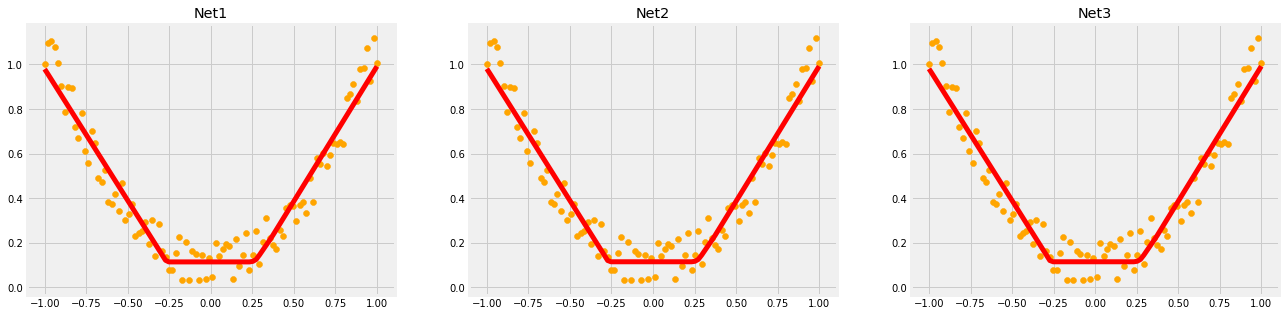

In [46]:
# save net1
save()
# restore entire net (may slow)
restore_net()
# restore only the net parameters
restore_params()

## Train on batch
---
![](https://i0.wp.com/mlexplained.com/wp-content/uploads/2018/02/%E3%82%B9%E3%82%AF%E3%83%AA%E3%83%BC%E3%83%B3%E3%82%B7%E3%83%A7%E3%83%83%E3%83%88-2018-02-07-10.32.59.png?w=1500)

In [47]:
import torch
import torch.utils.data as Data

torch.manual_seed(1)    # reproducible

In [48]:
BATCH_SIZE = 5
# BATCH_SIZE = 8

#Generate dataset

x = torch.linspace(1, 10, 10)       # this is x data (torch tensor)
y = torch.linspace(10, 1, 10)       # this is y data (torch tensor)

### Load dataset 

In [49]:
torch_dataset = Data.TensorDataset(x, y)
loader = Data.DataLoader(
    dataset=torch_dataset,      # torch TensorDataset format
    batch_size=BATCH_SIZE,      # mini batch size
    shuffle=True,               # random shuffle for training
    num_workers=2,              # subprocesses for loading data
)

### Model Training

In [51]:
def show_batch():
    for epoch in range(3):   # train entire dataset 3 times
        for step, (batch_x, batch_y) in enumerate(loader):  # for each training step
            # train your data...
            print('Epoch: ', epoch, '| Step: ', step, '| batch x: ',
                  batch_x.numpy(), '| batch y: ', batch_y.numpy())

In [52]:
if __name__ == '__main__':
    show_batch()

Epoch:  0 | Step:  0 | batch x:  [ 5.  7. 10.  3.  4.] | batch y:  [6. 4. 1. 8. 7.]
Epoch:  0 | Step:  1 | batch x:  [2. 1. 8. 9. 6.] | batch y:  [ 9. 10.  3.  2.  5.]
Epoch:  1 | Step:  0 | batch x:  [ 4.  6.  7. 10.  8.] | batch y:  [7. 5. 4. 1. 3.]
Epoch:  1 | Step:  1 | batch x:  [5. 3. 2. 1. 9.] | batch y:  [ 6.  8.  9. 10.  2.]
Epoch:  2 | Step:  0 | batch x:  [ 4.  2.  5.  6. 10.] | batch y:  [7. 9. 6. 5. 1.]
Epoch:  2 | Step:  1 | batch x:  [3. 9. 1. 8. 7.] | batch y:  [ 8.  2. 10.  3.  4.]


## Optimizers
![](https://image.slidesharecdn.com/optimizationtalk-171126132036/95/optimization-for-deep-learning-26-638.jpg?cb=1511702523)

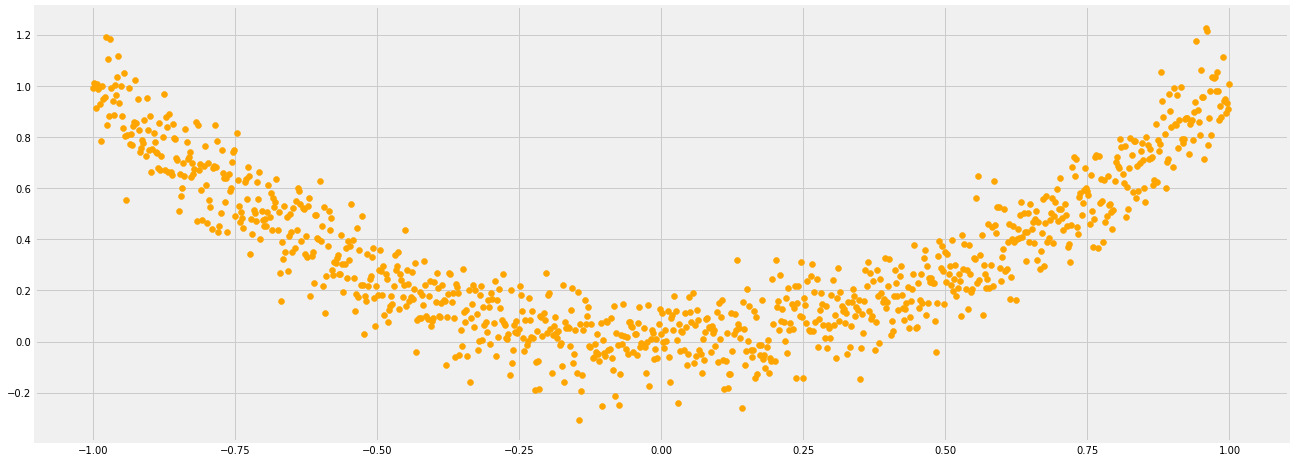

In [53]:
LR = 0.01
BATCH_SIZE = 32
EPOCH = 12
# fake dataset
x = torch.unsqueeze(torch.linspace(-1, 1, 1000), dim=1)
y = x.pow(2) + 0.1*torch.normal(torch.zeros(*x.size()))

# plot dataset
plt.figure(figsize=(20,8))
plt.scatter(x.numpy(), y.numpy(), color = "orange")
plt.show()

### Put Dataset in torch dataset

In [54]:
torch_dataset = Data.TensorDataset(x, y)
loader = Data.DataLoader(
    dataset=torch_dataset, 
    batch_size=BATCH_SIZE, 
    shuffle=True, num_workers=2,)

In [55]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(1, 20)   # hidden layer
        self.predict = torch.nn.Linear(20, 1)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

### Different Net with default network

In [59]:
net_SGD         = Net()
net_Momentum    = Net()
net_RMSprop     = Net()
net_Adam        = Net()
nets = [net_SGD, net_Momentum, net_RMSprop, net_Adam]

### Different optimizers

In [60]:
opt_SGD         = torch.optim.SGD(net_SGD.parameters(), lr=LR)
opt_Momentum    = torch.optim.SGD(net_Momentum.parameters(), lr=LR, momentum=0.8)
opt_RMSprop     = torch.optim.RMSprop(net_RMSprop.parameters(), lr=LR, alpha=0.9)
opt_Adam        = torch.optim.Adam(net_Adam.parameters(), lr=LR, betas=(0.9, 0.99))
optimizers = [opt_SGD, opt_Momentum, opt_RMSprop, opt_Adam]

In [61]:
loss_func = torch.nn.MSELoss()
losses_his = [[], [], [], []]   # record loss

Epoch:  0
Epoch:  1


/home/linu/.local/lib/python3.5/site-packages/ipykernel_launcher.py:13: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  del sys.path[0]


Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Epoch:  11


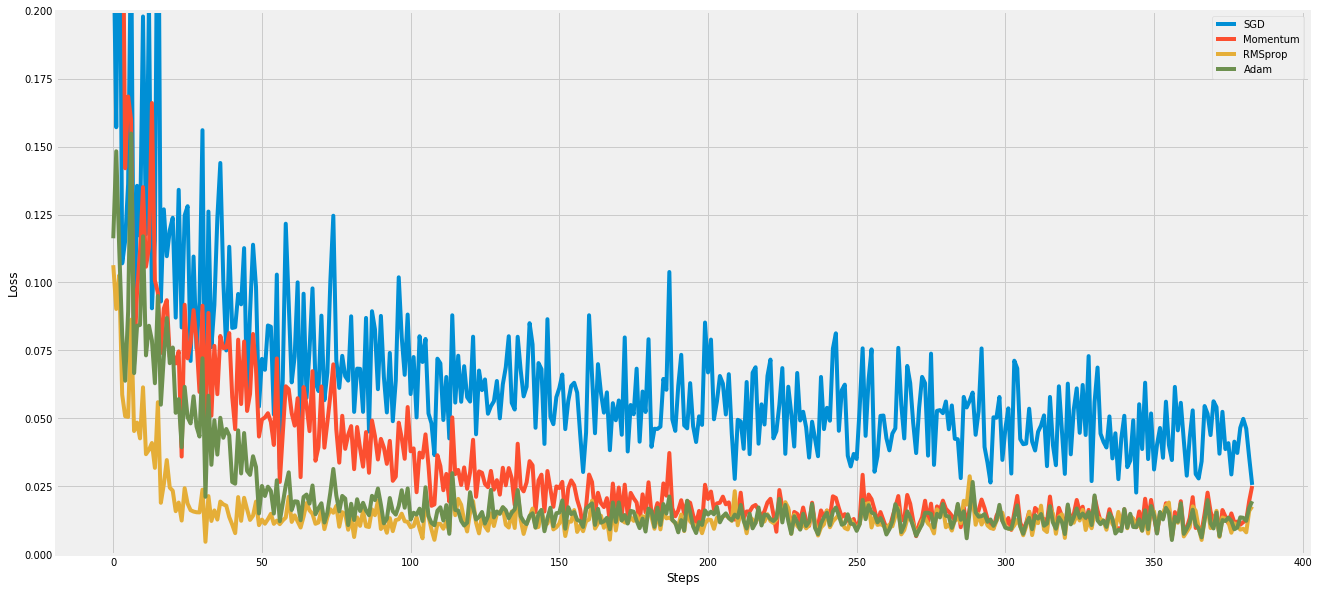

In [62]:
for epoch in range(EPOCH):
    print('Epoch: ', epoch)
    for step, (batch_x, batch_y) in enumerate(loader):          # for each training step
        b_x = Variable(batch_x)
        b_y = Variable(batch_y)

        for net, opt, l_his in zip(nets, optimizers, losses_his):
            output = net(b_x)              # get output for every net
            loss = loss_func(output, b_y)  # compute loss for every net
            opt.zero_grad()                # clear gradients for next train
            loss.backward()                # backpropagation, compute gradients
            opt.step()                     # apply gradients
            l_his.append(loss.data[0])     # loss recoder
plt.figure(figsize = (20,10))
labels = ['SGD', 'Momentum', 'RMSprop', 'Adam']
for i, l_his in enumerate(losses_his):
    plt.plot(l_his, label=labels[i])
plt.legend(loc='best')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.ylim((0, 0.2))
plt.show()